# Proyecto de Grado - Ciencia de Datos
# Universidad Libre Cali
## Leiner Ceballos Rodriguez
## David Cespedes

In [124]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

In [138]:
tbl_facturas = pd.read_excel("TBL_FACTURAS.xlsx")
tbl_facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129069 entries, 0 to 129068
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   PREFIJO      129069 non-null  object        
 1   CONSECUTIVO  129069 non-null  int64         
 2   ID_FACTURA   129069 non-null  int64         
 3   SUCURSAL     129069 non-null  int64         
 4   CLIENTE      129069 non-null  int64         
 5   TOTAL        129069 non-null  float64       
 6   FECHA        129069 non-null  datetime64[ns]
 7   DIA          129069 non-null  int64         
 8   MES          129069 non-null  int64         
 9   AÑO          129069 non-null  int64         
 10  CONTRATO     53640 non-null   float64       
 11  USUARIO      129069 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 11.8+ MB


In [126]:
tbl_sucursales = pd.read_excel("TBL_SUCURSALES.xlsx")

In [127]:
# Unión entre ambos DataFrames
df_fact_sucursal = pd.merge(left=tbl_facturas,right=tbl_sucursales, left_on='SUCURSAL', right_on='ID_SUCURSAL')

### Se exportan los datos necesarios para crear un solo DataFrame

In [128]:
# Se exportan los datos de la tabla de contratos
tbl_contratos = pd.read_excel("TBL_CONTRATOS.xlsx")
# Unión entre el merge y tbl_contratos
merged_contratos = pd.merge(left=tbl_contratos, right=df_fact_sucursal, how='left', left_on='ID_CONTRATO', right_on='CONTRATO')
# Se exportan los datos de la tabla de planes isp
tbl_planes = pd.read_excel("TBL_PLANES_ISP.xlsx")
# Unión entre el merge y tbl_planes_isp
merged_planes = pd.merge(left=merged_contratos,right=tbl_planes, left_on='PLANISP', right_on='ID_PLAN_ISP')
# Se exportan los datos de la tabla de productos
tbl_productos = pd.read_excel("TBL_PRODUCTOS.xlsx")
# Unión entre el merge y tbl_productos
merged_productos = pd.merge(left=merged_planes,right=tbl_productos, left_on='PRODUCTO', right_on='ID_PRODUCTO')

### Datos Finales

In [129]:
datos = pd.DataFrame(merged_productos)

### Se limpian los datos vacios o nulos

In [130]:
# ¿Hay datos nulos?
print(datos.info())
print(datos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45463 entries, 0 to 45462
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_CONTRATO      45463 non-null  int64         
 1   PLANISP          45463 non-null  int64         
 2   SERVER           45463 non-null  int64         
 3   EQUIPO           45463 non-null  int64         
 4   ROUTER_UK        45463 non-null  int64         
 5   IP               45463 non-null  object        
 6   MAC              45462 non-null  object        
 7   FECHA_CONTRATO   45463 non-null  datetime64[ns]
 8   MEDIO_CONEXION   45463 non-null  object        
 9   PREFIJO          45043 non-null  object        
 10  CONSECUTIVO      45043 non-null  float64       
 11  ID_FACTURA       45043 non-null  float64       
 12  SUCURSAL         45043 non-null  float64       
 13  CLIENTE          45043 non-null  float64       
 14  TOTAL            45043 non-null  float

### Algunos datos de la base de datos son nulos o NaN, debemos cambiarlo para tener una base de datos uniforme

In [131]:
datos['DIRECCION'].fillna("SIN DIRECCIÓN", inplace = True) # Direccion
datos['PREFIJO'].fillna("NO TIENE", inplace = True) # Prefijo
datos['ID_FACTURA'].fillna(0, inplace = True) # id factura
datos['SUCURSAL'].fillna(0, inplace = True) # Sucursal
datos['CLIENTE'].fillna(0, inplace = True) # Cliente
datos['TOTAL'].fillna(0, inplace = True) # Total
datos['CONTRATO'].fillna(0, inplace = True) # Contrato
datos['USUARIO'].fillna(0, inplace = True) # Usuario
datos['ID_SUCURSAL'].fillna(0, inplace = True) # Id sucursal

### Con el código anterior reemplazamos el valor nulo en los datos por una cadena, támbien se puede reemplazar por el promedio de la columna si fuera un campo de valores o eliminar las filas con datos nulos

### Se genera una visualización de los datos codificados

In [132]:
datos.head()

,ID_CONTRATO,PLANISP,SERVER,EQUIPO,ROUTER_UK,IP,MAC,FECHA_CONTRATO,MEDIO_CONEXION,PREFIJO,...,LATITUD,COORDENADAS,ID_PLAN_ISP,PRODUCTO,MAX_BAJADA,MAX_SUBIDA,MIN_BAJADA,MIN_SUBIDA,ID_PRODUCTO,NOMBRE_PRODUCTO
0,1,33,6,451,155,10.10.8.10,24:A4:3C:4E:88:94,2017-10-23,RADIO ENLACE,NO TIENE,...,NaN,NaN,33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
1,2010,33,1,6560,311,10.1.0.13,44:D9:E7:5C:EA:1C,2018-04-04,RADIO ENLACE,NO TIENE,...,NaN,NaN,33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
2,2490,33,6,7374,354,10.10.8.179,FC:EC:DA:64:0F:42,2018-10-04,RADIO ENLACE,FE,...,-76.519489,"3.415502003973917,-76.51948932806492",33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
3,2490,33,6,7374,354,10.10.8.179,FC:EC:DA:64:0F:42,2018-10-04,RADIO ENLACE,FE,...,-76.519489,"3.415502003973917,-76.51948932806492",33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO
4,2490,33,6,7374,354,10.10.8.179,FC:EC:DA:64:0F:42,2018-10-04,RADIO ENLACE,FE,...,-76.519489,"3.415502003973917,-76.51948932806492",33,309,22000,10000,0,0,309,INTERNET HOGAR RADIO BASICO


### DataFrame

In [140]:
df_main = pd.DataFrame(tbl_facturas)
df_main.columns

Index(['PREFIJO', 'CONSECUTIVO', 'ID_FACTURA', 'SUCURSAL', 'CLIENTE', 'TOTAL',
       'FECHA', 'DIA', 'MES', 'AÑO', 'CONTRATO', 'USUARIO'],
      dtype='object')


### Se analiza el resultado para hallar las posibles correlaciones entre Total en ventas y los planes de internet.

(array([3.0040e+04, 1.4483e+04, 8.9800e+02, 9.0000e+00, 2.1000e+01,
        9.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([  2100.,  24418.,  46736.,  69054.,  91372., 113690., 136008.,
        158326., 180644., 202962., 225280.]),
 <BarContainer object of 10 artists>)

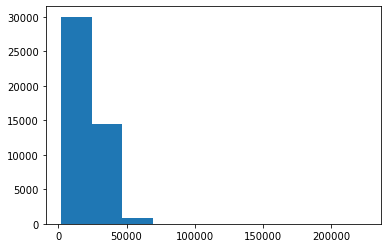

In [141]:
# Histograma de velocidad de descarga Kb
plt.hist(datos["MAX_BAJADA"])

### Varias empresas de la categoría de proveedores de internet poseen mayores velocidades en sus planes que la empresa x. Este hecho puede afectar el desempeño en ventas del servicio.

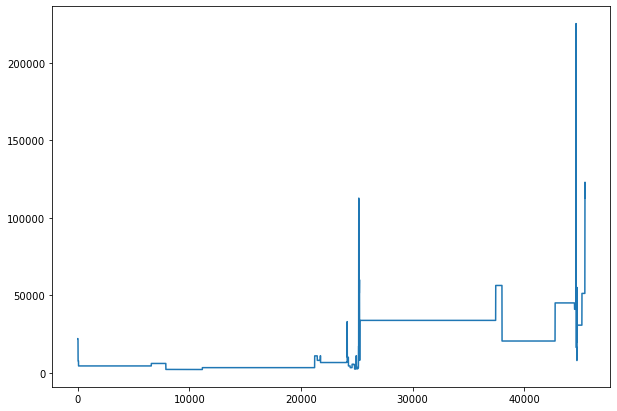

In [143]:
# Gráfica de la velocidad de descarga Kb
plot = datos["MAX_BAJADA"].plot(figsize=(10,7))

### Comportamientos

In [144]:
# Librerias
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [145]:
print("Fecha inicial", df_main['FECHA'].min())
print("Fecha final", df_main['FECHA'].max())
print("Cantidad de dias", df_main['FECHA'].max() - df_main['FECHA'].min() )

Fecha inicial 2013-07-01 00:00:00
Fecha final 2021-05-20 00:00:00
Cantidad de dias 2880 days 00:00:00


In [146]:
# Se crea un Data Frame para realizar la serie de tiempo
valor = {
    'FECHA' : df_main['FECHA'],
    'TOTAL': df_main['TOTAL']
}
df_valor = pd.DataFrame(valor)
# se cambie el index del DataFrame
df_valor = df_valor.set_index('FECHA')
df_valor.head()

,TOTAL
FECHA,
2013-07-01,5200.0
2013-07-01,5200.0
2013-07-02,18200.0
2013-07-02,60000.0
2013-07-02,60000.0


### Comportamiento de los ganancias a nivel general

<AxesSubplot:xlabel='FECHA'>

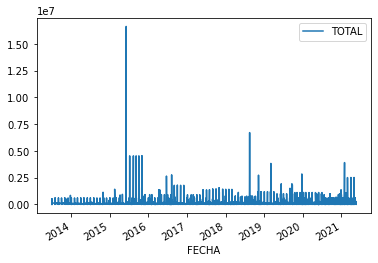

In [147]:
df_valor.plot()

### Total de ventas por mes

<AxesSubplot:xlabel='FECHA'>

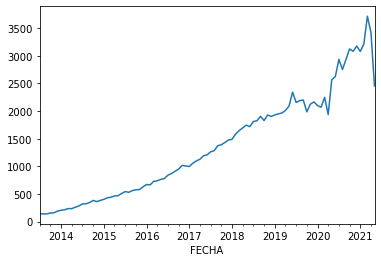

In [154]:
# resample y agregacion por mes
valor_resample_mes = df_valor.TOTAL.resample('M').count()
# asignar día de la semana
df_resample = pd.concat([valor_resample_mes], axis=1)
df_resample['dayofweek'] = df_resample.index.dayofweek # 0 es lunes
# lunes a domingo
df_lun_to_dom = df_resample[df_resample.dayofweek.isin([0,1,2,3,4,5,6])].TOTAL

df_lun_to_dom.plot()

### Zonas donde se realizan las ventas

### Series de tiempo ¿cómo serán ventas en las distintas sucursales?

In [170]:
# Se crea un Data Frame con base al año anterior (2020)
from datetime import date

valores = {
    'FECHA' : datos['FECHA'],
    'SUCURSAL': datos['ZONA'],
    'QTY' : datos['TOTAL']
}

df_valores = pd.DataFrame(valores)
df_valores= df_valores.groupby(['SUCURSAL'])['QTY'].count().reset_index()
df_valores = pd.DataFrame(df_valores)
df_valores.drop_duplicates()
# Colocar dias por columnas
#df_valores= df_valores.groupby(['SUCURSAL'])
#df_valores = df_valores.set_index('FECHA').reset_index()
#df_valores = df_valores.T
#df_valores.rename(columns = {'FECHA':'TEST'}, inplace = True)
#ix=pd.DatetimeIndex(df_valores.groupby(['FECHA']))
#df_valores = df_valores.reindex(ix)
#df_valores= df_valores.groupby(['SUCURSAL','FECHA'])['QTY'].count().reset_index()
#df_valores = df_valores.drop(columns=['FECHA'])
#df_valores = df_valores.T
#df_valores = df_valores.groupby('SUCURSAL').agg('sum')
df_valores.values

array([['BUENAVENTURA', 56],
       ['CALI', 37333],
       ['CANDELARIA', 444],
       ['CAUCA', 499],
       ['DAGUA VALLE', 6457],
       ['KM 30', 254]], dtype=object)

In [201]:
df2 = pd.pivot_table(datos,
               index=['ZONA'],
               columns=['FECHA'],
               values=['TOTAL'],
               aggfunc='count',
               fill_value=0,
               margins=False,
               margins_name='Total')

In [202]:
df2.head()

TOTAL                                              \
FECHA        2019-10-07 2019-10-10 2019-10-15 2019-10-18 2019-10-21   
ZONA                                                                  
BUENAVENTURA          0          0          1          1          0   
CALI                 36        228        231        145         47   
CANDELARIA            0          0          0          0          0   
CAUCA                 1          8          7          3          1   
DAGUA VALLE          10         41         29         48          8   

                                                                     ...  \
FECHA        2019-10-22 2019-10-25 2019-10-29 2019-10-30 2019-10-31  ...   
ZONA                                                                 ...   
BUENAVENTURA          1          0          0          0          0  ...   
CALI                 89        150         74         13         18  ...   
CANDELARIA            0          0          0          0          0  ...   
CAUCA                 2          3          1          0          0  ...   
DAGUA VALLE          14         43         16          2          2  ...   

                                                                     \
FECHA        2021-05-04 2021-05-06 2021-05-07 2021-05-08 2021-05-10   
ZONA                                                                  
BUENAVENTURA          0          0          0          0          0   
CALI                  1          3        809          1        153   
CANDELARIA            0          0         40          0         11   
CAUCA                 0          0          7          0          3   
DAGUA VALLE           0          0        123          0         23   

                                                                     
FECHA        2021-05-11 2021-05-13 2021-05-18 2021-05-19 2021-05-20  
ZONA                                                                 
BUENAVENTURA          0          0          0          0          0  
CALI                  2          1        652         75        149  
CANDELARIA            0          0         31          6         14  
CAUCA                 0          0          4          1          0  
DAGUA VALLE           0          0        117          5         22  

[5 rows x 378 columns]

In [204]:
df3 = pd.read_csv(f'time_series_covid19_confirmed_global.csv')
df3 = df3.groupby('Country/Region').agg('sum')
df3.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138
